In [1]:
library(arules)
library(arulesViz)

Warning message:
"package 'arules' was built under R version 3.6.2"Loading required package: Matrix

Attaching package: 'arules'

The following objects are masked from 'package:base':

    abbreviate, write

Warning message:
"package 'arulesViz' was built under R version 3.6.2"Loading required package: grid
Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Registered S3 method overwritten by 'seriation':
  method         from 
  reorder.hclust gclus


In [2]:
df <-read.transactions("datasets/dataset.csv", format="basket", sep=",", skip=0)

Warning message in scan(text = l, what = "character", sep = sep, quote = quote, :
"Koniec pliku wewnątrz cudzysłowia"Warning message in scan(text = l, what = "character", sep = sep, quote = quote, :
"Koniec pliku wewnątrz cudzysłowia"Warning message in scan(text = l, what = "character", sep = sep, quote = quote, :
"Koniec pliku wewnątrz cudzysłowia"Warning message in scan(text = l, what = "character", sep = sep, quote = quote, :
"Koniec pliku wewnątrz cudzysłowia"Warning message in scan(text = l, what = "character", sep = sep, quote = quote, :
"Koniec pliku wewnątrz cudzysłowia"Warning message in asMethod(object):
"removing duplicated items in transactions"

In [3]:
df

transactions in sparse format with
 570 transactions (rows) and
 11659 items (columns)

In [28]:
summary(df)

transactions as itemMatrix in sparse format with
 570 rows (elements/itemsets/transactions) and
 11659 columns (items) and a density of 0.0029949 

most frequent items:
    Janusz_Chabior     Piotr_Głowacki      Łukasz_Simlat   Marian_Dziędziel 
                45                 41                 35                 33 
Przemysław_Bluszcz            (Other) 
                32              19717 

element (itemset/transaction) length distribution:
sizes
  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19  20 
 22  14  14  10  11  15   7  10   9   9   6   6   9  10  15  16  12   5  12  15 
 21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40 
  7  12   7  11   5  10   5   7   6   9   3  10   6   5   7   4   5  10   8   5 
 41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60 
 11   5   6  12   5  12   2   8   2   2   7   4   2   4   6   1   4   5   2   3 
 61  62  63  64  65  67  68  69  70  71  72  73  74  75

In [116]:
LIST(head(df,3))

[[1]]
[1] "Aleksander_Mikołajczak" "Sławomir_Śmiałek"      

[[2]]
 [1] "Agnar_Jeger_Holst"     "Benjamin_Helstad"      "Daniel_Berg"          
 [4] "Ellen_Dorrit_Petersen" "Frank_Thomas_Andersen" "Julian_Karlsson"      
 [7] "Kimmo_Rajala"          "Kirsti_Asskildt"       "Kristoffer_Joner"     
[10] "Magnar_Botten"         "Magnus_Langlete"       "Markus_Brustad"       
[13] "Martin_Slaatto"        "Morten_L?vstad"        "Nils_Fredrik_Tveter"  
[16] "Odin_Gineson_Br?derud" "Per_G?rvell"           "Ragnhild_Vannebo"     
[19] "Richard_Safin"         "Stellan_Skarsg?rd"     "Tommy_Jakob_H?land"   
[22] "Trond_Nilssen"        

[[3]]
[1] "Natalia_Brożyńska"

In [117]:
LIST(tail(df,3))

[[1]]
 [1] "Adam_Balski"                 "Adrian_Kłos"                
 [3] "Aleksandra_Szwed"            "Andrzej_Fonfara"            
 [5] "Andrzej_Kostyra"             "Anna_Adamska"               
 [7] "Anna_Karczmarczyk"           "Antoni_Chmielewski"         
 [9] "Arkadiusz_Tańcula"           "Arkadiusz_Wrzosek"          
[11] "Bartłomiej_Kotschedoff"      "Bartosz_Fabiański"          
[13] "Daniel_Kuczaj"               "Daniel_Szczypa"             
[15] "Dariusz_Sęk"                 "Dariusz_Starczewski"        
[17] "Dariusz_Włodarczyk"          "Edward_Durda"               
[19] "Gareth_Lawrence"             "Grzegorz_Proksa"            
[21] "Jarosław_Boberek"            "Karol_Osentowski"           
[23] "Katarzyna_Maciąg"            "Krzysztof_Diablo_Włodarczyk"
[25] "Krzysztof_Kosedowski"        "Krzysztof_Stelmaszyk"       
[27] "Krzysztof_Szamałek"          "Maciej_Nawrocki"            
[29] "Marcin_Różalski"             "Marzena_Kipiel_Sztuka"      
[31] "Michał_Bobrowski"            "Michał_Kita"                
[33] "Mikołaj_Roznerski"           "Monika_Pietrasińska"        
[35] "Norbert_Dąbrowski"           "Piotr_Stramowski"           
[37] "Robert_Wabich"               "Robert_Złotkowski"          
[39] "Tomasz_Jakubiec"             "Tomasz_Oświeciński"         
[41] "Wiktoria_Nojszewska"         "Wojciech_Jagielski"         
[43] "Wojciech_Mecwaldowski"      

[[2]]
 [1] "Adrian_Igielski"        "Agata_Jackowska"        "Agnieszka_Włodarczyk"  
 [4] "Aleksandra_Dziduch"     "Aleksandra_Linda"       "Aleksy_Komorowski"     
 [7] "Alex_Strong"            "Bartłomiej_Krat"        "Bogusław_Linda"        
[10] "Cezary_Łukaszewicz"     "Cezary_Pazura"          "Cezary_Żak"            
[13] "Damian_Kret"            "Dominika_Kachlik"       "Dominika_Krzemińska"   
[16] "Jacek_Beler"            "Jagoda_Judzińska"       "Jędrzej_Wielecki"      
[19] "Joanna_Majstrak"        "Joanna_Opozda"          "Kamil_Bończyk"         
[22] "Kamila_Zwierzyńska"     "Karolina_Pilarczyk"     "Karolina_Szymczak"     
[25] "Katarzyna_Figura"       "Krzysztof_Piekarz"      "Krzysztof_Pyziak"      
[28] "Lena_Kołodziejczak"     "Luiza_Matyba"           "Magda_Ho"              
[31] "Magdalena_Emilianowicz" "Marcin_Różalski"        "Marek_Wadas"           
[34] "Margo_Marlow"           "Mateusz_Janusz"         "Mikołaj_Roznerski"     
[37] "Mirosław_Zbrojewicz"    "Monika_Sikocińska"      "Monika_Włoch"          
[40] "Olga_Niedzielska"       "Pamela_Stefanowicz"     "Patricia_Kazadi"       
[43] "Paweł_Orłowski"         "Paweł_Siergiej"         "Paweł_Staliński"       
[46] "Piotr_Witkowski"        "Przemysław_Wyszyński"   "Rafał_Mohr"            
[49] "Tomasz_Włosok"          "Vanessa_Gazda"          "Wojciech_Bocianowski"  

[[3]]
  [1] "Adam_Fusik"               "Adam_Narloch"            
  [3] "Adrian_Kłos"              "Agnieszka_Maracewicz"    
  [5] "Agnieszka_Sztuk"          "Aleksander_Janiszewski"  
  [7] "Aleksander_Mackiewicz"    "Alessio_Palmerii"        
  [9] "Alicja_Szramke_Kłos"      "Andrzej_Brydak"          
 [11] "Andrzej_Grabowski"        "Andrzej_Olszewski"       
 [13] "Andrzej_Pieńko"           "Andrzej_Rozmus"          
 [15] "Andrzej_Wejngold"         "Anna_Karczmarczyk"       
 [17] "Anna_Kędziora"            "Anna_Wicka"              
 [19] "Antoni_Królikowski"       "Arkadiusz_Świetlik"      
 [21] "Bartłomiej_Górecki"       "Bartłomiej_Zobek"        
 [23] "Bartosz_Obuchowicz"       "Damian_Jankowski"        
 [25] "Daniel_Olbrychski"        "Dariusz_Dłużewski"       
 [27] "Dariusz_Kowalczyk"        "Eliza_Gwiazda"           
 [29] "Ewa_Kasprzyk"             "Filip_Moroz"             
 [31] "Filip_Wałcerz"            "Gizella_Bortel"          
 [33] "Grzegorz_Barłog"          "Hanna_Różańska"          
 [35] "Hubert_Maj"               "Iga_Górecka"             
 [37] "Iwona_Bielska"            "Izabela_Jarosińska"      
 [39] "Jakub_Matysek"            "Jakub_Orzechowski"       
 [41] "Jakub_Sporek"

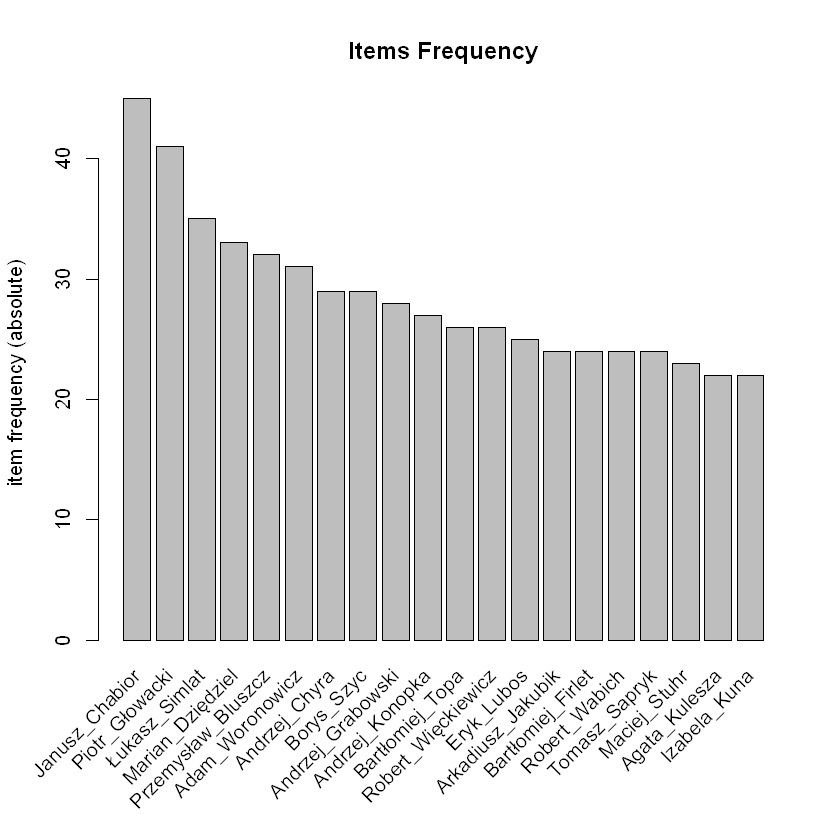

In [47]:
itemFrequencyPlot(df, topN=20, type="absolute", main="Items Frequency", cex.names=1) 

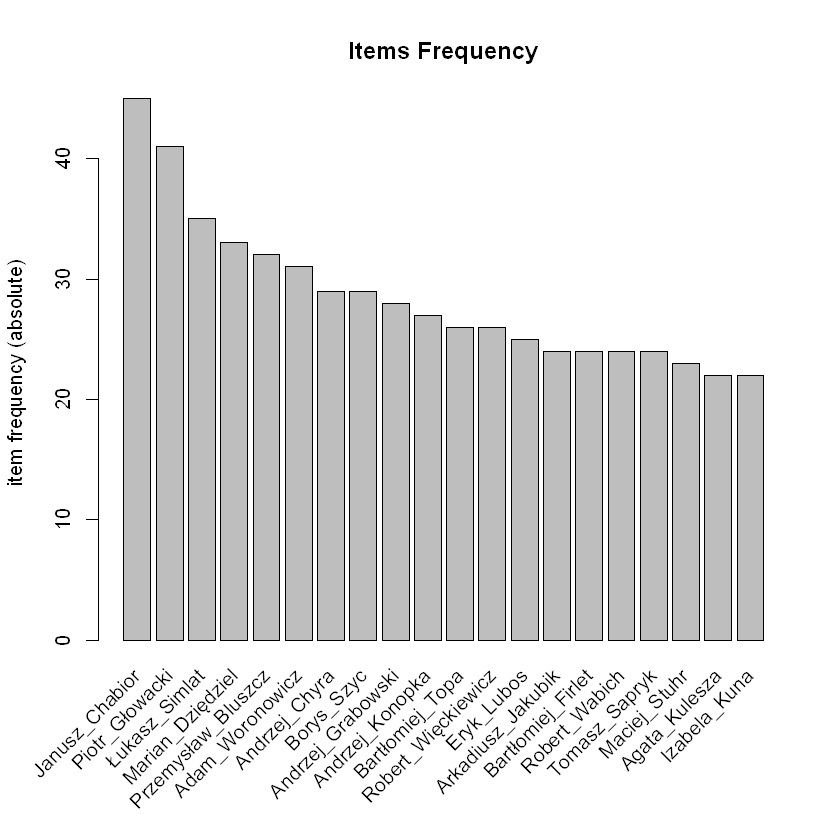

In [46]:
itemFrequencyPlot(df, topN=20, type="relative", main="Items Frequency", cex.names=1) 

In [42]:
head(sort(itemFrequency(df), decreasing=TRUE), n=10)

Janusz_Chabior     Piotr_Głowacki      Łukasz_Simlat   Marian_Dziędziel 
        0.07894737         0.07192982         0.06140351         0.05789474 
Przemysław_Bluszcz    Adam_Woronowicz      Andrzej_Chyra         Borys_Szyc 
        0.05614035         0.05438596         0.05087719         0.05087719 
 Andrzej_Grabowski    Andrzej_Konopka 
        0.04912281         0.04736842

In [118]:
crossTable(df, measure="count", sort=TRUE)[1:15,1:15]

,Janusz_Chabior,Piotr_Głowacki,Łukasz_Simlat,Marian_Dziędziel,Przemysław_Bluszcz,Adam_Woronowicz,Andrzej_Chyra,Borys_Szyc,Andrzej_Grabowski,Andrzej_Konopka,Bartłomiej_Topa,Robert_Więckiewicz,Eryk_Lubos,Arkadiusz_Jakubik,Bartłomiej_Firlet
Janusz_Chabior,45,6,5,5,5,8,3,3,6,1,2,3,8,3,4
Piotr_Głowacki,6,41,5,4,4,3,2,4,2,4,3,4,3,2,2
Łukasz_Simlat,5,5,35,6,4,4,5,3,2,3,5,4,3,2,1
Marian_Dziędziel,5,4,6,33,4,7,2,4,5,2,6,5,6,4,2
Przemysław_Bluszcz,5,4,4,4,32,3,0,2,2,3,4,4,3,3,2
Adam_Woronowicz,8,3,4,7,3,31,1,2,3,4,3,6,4,3,1
Andrzej_Chyra,3,2,5,2,0,1,29,1,3,3,2,2,2,4,1
Borys_Szyc,3,4,3,4,2,2,1,29,5,1,2,1,1,1,4
Andrzej_Grabowski,6,2,2,5,2,3,3,5,28,1,2,2,4,3,5
Andrzej_Konopka,1,4,3,2,3,4,3,1,1,27,4,3,2,3,1


In [125]:
crossTable(df, measure="lift", sort=TRUE)[1:15,1:15]

,Janusz_Chabior,Piotr_Głowacki,Łukasz_Simlat,Marian_Dziędziel,Przemysław_Bluszcz,Adam_Woronowicz,Andrzej_Chyra,Borys_Szyc,Andrzej_Grabowski,Andrzej_Konopka,Bartłomiej_Topa,Robert_Więckiewicz,Eryk_Lubos,Arkadiusz_Jakubik,Bartłomiej_Firlet
Janusz_Chabior,NA,1.8536585,1.8095238,1.919192,1.979167,3.2688172,1.3103448,1.3103448,2.7142857,0.4691358,0.9743590,1.4615385,4.0533333,1.5833333,2.1111111
Piotr_Głowacki,1.8536585,NA,1.9860627,1.685144,1.737805,1.3453973,0.9587889,1.9175778,0.9930314,2.0596206,1.6041276,2.1388368,1.6682927,1.1585366,1.1585366
Łukasz_Simlat,1.8095238,1.9860627,NA,2.961039,2.035714,2.1013825,2.8078818,1.6847291,1.1632653,1.8095238,3.1318681,2.5054945,1.9542857,1.3571429,0.6785714
Marian_Dziędziel,1.9191919,1.6851441,2.9610390,NA,2.159091,3.9002933,1.1912226,2.3824451,3.0844156,1.2794613,3.9860140,3.3216783,4.1454545,2.8787879,1.4393939
Przemysław_Bluszcz,1.9791667,1.7378049,2.0357143,2.159091,NA,1.7237903,0.0000000,1.2284483,1.2723214,1.9791667,2.7403846,2.7403846,2.1375000,2.2265625,1.4843750
Adam_Woronowicz,3.2688172,1.3453973,2.1013825,3.900293,1.723790,NA,0.6340378,1.2680756,1.9700461,2.7240143,2.1215881,4.2431762,2.9419355,2.2983871,0.7661290
Andrzej_Chyra,1.3103448,0.9587889,2.8078818,1.191223,0.000000,0.6340378,NA,0.6777646,2.1059113,2.1839080,1.5119363,1.5119363,1.5724138,3.2758621,0.8189655
Borys_Szyc,1.3103448,1.9175778,1.6847291,2.382445,1.228448,1.2680756,0.6777646,NA,3.5098522,0.7279693,1.5119363,0.7559682,0.7862069,0.8189655,3.2758621
Andrzej_Grabowski,2.7142857,0.9930314,1.1632653,3.084416,1.272321,1.9700461,2.1059113,3.5098522,NA,0.7539683,1.5659341,1.5659341,3.2571429,2.5446429,4.2410714
Andrzej_Konopka,0.4691358,2.0596206,1.8095238,1.279461,1.979167,2.7240143,2.1839080,0.7279693,0.7539683,NA,3.2478632,2.4358974,1.6888889,2.6388889,0.8796296


In [64]:
freq.items <- eclat(df, parameter=list(supp=0.01))
inspect(freq.itemsets)

Eclat

parameter specification:
 tidLists support minlen maxlen            target   ext
    FALSE    0.01      1     10 frequent itemsets FALSE

algorithmic control:
 sparse sort verbose
      7   -2    TRUE

Absolute minimum support count: 5 

create itemset ... 
set transactions ...[11659 item(s), 570 transaction(s)] done [0.01s].
sorting and recoding items ... [495 item(s)] done [0.00s].
creating sparse bit matrix ... [495 row(s), 570 column(s)] done [0.00s].
writing  ... [550 set(s)] done [0.01s].
Creating S4 object  ... done [0.00s].
      items                                              support    count
[1]   {Marek_Kalita,Przemysław_Bluszcz}                  0.01052632  6   
[2]   {Łukasz_Simlat,Piotr_Tołoczko}                     0.01052632  6   
[3]   {Agata_Kulesza,Roman_Gancarczyk}                   0.01228070  7   
[4]   {Przemysław_Bluszcz,Wiesław_Cichy}                 0.01052632  6   
[5]   {Marcin_Juchniewicz,Robert_Wabich}                 0.01052632  6   
[6]   {Gabr

In [71]:
freq.rules<-ruleInduction(freq.items, df, confidence=0.85)
inspect(head(freq.rules))

    lhs                                  rhs                  support   
[1] {Filip_Guźla}                     => {Tomasz_Oświeciński} 0.01052632
[2] {Agata_Kulesza,Marcin_Dorociński} => {Marian_Dziędziel}   0.01052632
    confidence lift     itemset
[1] 0.8571429  32.57143 11     
[2] 1.0000000  17.27273 16     


In [24]:
rules <- apriori(df, 
    parameter = list(support = 0.01, confidence = 0.2))

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.2    0.1    1 none FALSE            TRUE       5    0.01      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 5 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[11659 item(s), 570 transaction(s)] done [0.01s].
sorting and recoding items ... [495 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 done [0.00s].
writing ... [80 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


In [25]:
summary(rules)

set of 80 rules

rule length distribution (lhs + rhs):sizes
 2  3 
77  3 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  2.000   2.000   2.000   2.038   2.000   3.000 

summary of quality measures:
    support          confidence          lift            count    
 Min.   :0.01053   Min.   :0.2069   Min.   : 2.714   Min.   :6.0  
 1st Qu.:0.01053   1st Qu.:0.2500   1st Qu.: 5.668   1st Qu.:6.0  
 Median :0.01053   Median :0.3182   Median : 6.483   Median :6.0  
 Mean   :0.01123   Mean   :0.3680   Mean   : 9.079   Mean   :6.4  
 3rd Qu.:0.01228   3rd Qu.:0.4286   3rd Qu.: 9.764   3rd Qu.:7.0  
 Max.   :0.01404   Max.   :1.0000   Max.   :32.571   Max.   :8.0  

mining info:
 data ntransactions support confidence
   df           570    0.01        0.2

In [26]:
inspect(head(sort(rules, by ="confidence"),5))

    lhs                                     rhs                  support   
[1] {Agata_Kulesza,Marcin_Dorociński}    => {Marian_Dziędziel}   0.01052632
[2] {Filip_Guźla}                        => {Tomasz_Oświeciński} 0.01052632
[3] {Wojciech_Kalinowski}                => {Tomasz_Oświeciński} 0.01052632
[4] {Wojciech_Machnicki}                 => {Janusz_Chabior}     0.01052632
[5] {Marcin_Dorociński,Marian_Dziędziel} => {Agata_Kulesza}      0.01052632
    confidence lift     count
[1] 1.0000000  17.27273 6    
[2] 0.8571429  32.57143 6    
[3] 0.7500000  28.50000 6    
[4] 0.7500000   9.50000 6    
[5] 0.7500000  19.43182 6    


In [27]:
inspect(head(sort(rules, by ="lift"),5))

    lhs                                 rhs                   support   
[1] {Filip_Guźla}                    => {Tomasz_Oświeciński}  0.01052632
[2] {Tomasz_Oświeciński}             => {Filip_Guźla}         0.01052632
[3] {Wojciech_Kalinowski}            => {Tomasz_Oświeciński}  0.01052632
[4] {Tomasz_Oświeciński}             => {Wojciech_Kalinowski} 0.01052632
[5] {Agata_Kulesza,Marian_Dziędziel} => {Marcin_Dorociński}   0.01052632
    confidence lift     count
[1] 0.8571429  32.57143 6    
[2] 0.4000000  32.57143 6    
[3] 0.7500000  28.50000 6    
[4] 0.4000000  28.50000 6    
[5] 0.7500000  21.37500 6    


In [28]:
inspect(head(sort(rules, by ="support"),5))

    lhs                    rhs                 support    confidence lift    
[1] {Marcin_Dorociński} => {Marian_Dziędziel}  0.01403509 0.4000000  6.909091
[2] {Marian_Dziędziel}  => {Marcin_Dorociński} 0.01403509 0.2424242  6.909091
[3] {Agata_Kulesza}     => {Marian_Dziędziel}  0.01403509 0.3636364  6.280992
[4] {Marian_Dziędziel}  => {Agata_Kulesza}     0.01403509 0.2424242  6.280992
[5] {Eryk_Lubos}        => {Janusz_Chabior}    0.01403509 0.3200000  4.053333
    count
[1] 8    
[2] 8    
[3] 8    
[4] 8    
[5] 8    


In [29]:
inspect(head(sort(rules, by ="count"),5))

    lhs                    rhs                 support    confidence lift    
[1] {Marcin_Dorociński} => {Marian_Dziędziel}  0.01403509 0.4000000  6.909091
[2] {Marian_Dziędziel}  => {Marcin_Dorociński} 0.01403509 0.2424242  6.909091
[3] {Agata_Kulesza}     => {Marian_Dziędziel}  0.01403509 0.3636364  6.280992
[4] {Marian_Dziędziel}  => {Agata_Kulesza}     0.01403509 0.2424242  6.280992
[5] {Eryk_Lubos}        => {Janusz_Chabior}    0.01403509 0.3200000  4.053333
    count
[1] 8    
[2] 8    
[3] 8    
[4] 8    
[5] 8    


Warning message in plot.rules(rules, measure = c("support", "confidence"), shading = "lift", :
"The parameter interactive is deprecated. Use engine='interactive' instead."To reduce overplotting, jitter is added! Use jitter = 0 to prevent jitter.


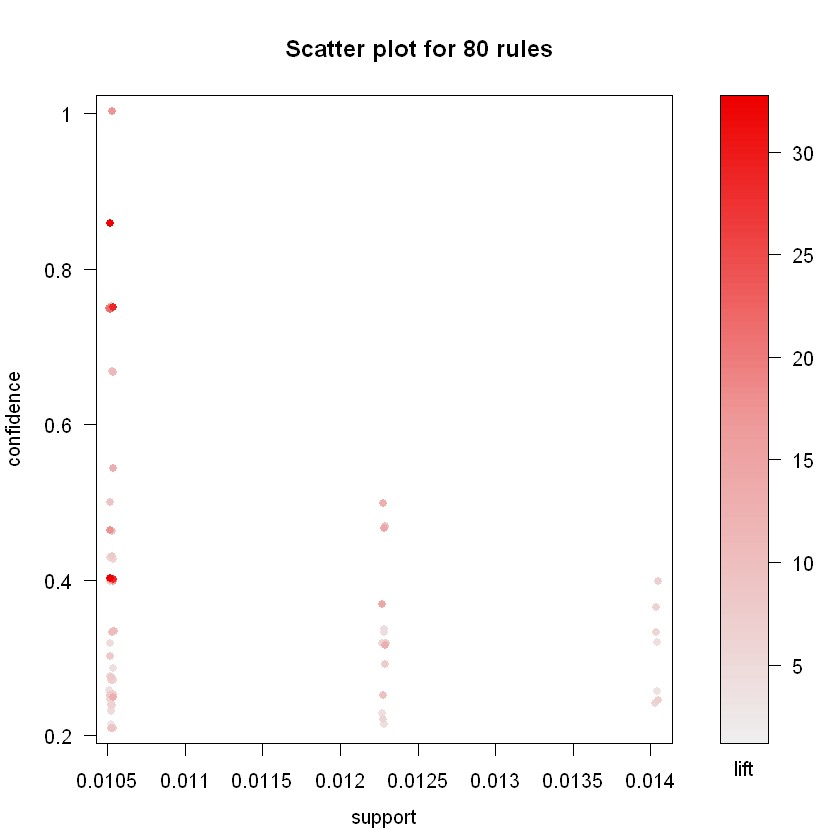

In [30]:
plot(rules, measure=c("support", "confidence"), shading="lift", interactive=FALSE)

In [110]:
6/570

[1] 0.01052632

In [111]:
7/570

[1] 0.0122807

In [113]:
rules1 <- apriori(df, 
    parameter = list(support = 0.01, confidence = 0.5))

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.5    0.1    1 none FALSE            TRUE       5    0.01      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 5 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[11659 item(s), 570 transaction(s)] done [0.01s].
sorting and recoding items ... [495 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 done [0.00s].
writing ... [11 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


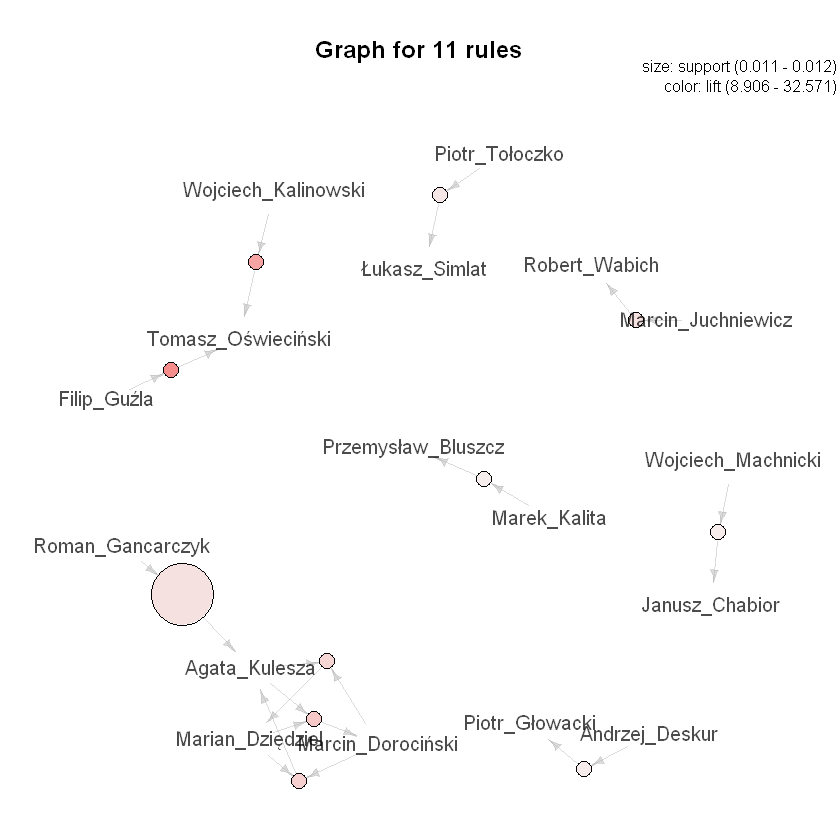

In [114]:
plot(rules1, method="graph")

In [129]:
rules <- apriori(df, 
    parameter = list(support = 0.01, confidence = 0.01))

chabior.rules <- sort(subset(rules, subset = rhs %in% "Janusz_Chabior"), 
                   by = "confidence")

summary(chabior.rules)
inspect(chabior.rules)

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
       0.01    0.1    1 none FALSE            TRUE       5    0.01      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 5 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[11659 item(s), 570 transaction(s)] done [0.01s].
sorting and recoding items ... [495 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 done [0.00s].
writing ... [606 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


set of 8 rules

rule length distribution (lhs + rhs):sizes
1 2 
1 7 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   2.000   2.000   1.875   2.000   2.000 

summary of quality measures:
    support          confidence           lift           count      
 Min.   :0.01053   Min.   :0.07895   Min.   :1.000   Min.   : 6.00  
 1st Qu.:0.01053   1st Qu.:0.19730   1st Qu.:2.499   1st Qu.: 6.00  
 Median :0.01053   Median :0.28903   Median :3.661   Median : 6.00  
 Mean   :0.01996   Mean   :0.32453   Mean   :4.111   Mean   :11.38  
 3rd Qu.:0.01404   3rd Qu.:0.40714   3rd Qu.:5.157   3rd Qu.: 8.00  
 Max.   :0.07895   Max.   :0.75000   Max.   :9.500   Max.   :45.00  

mining info:
 data ntransactions support confidence
   df           570    0.01       0.01

    lhs                     rhs              support    confidence lift    
[1] {Wojciech_Machnicki} => {Janusz_Chabior} 0.01052632 0.75000000 9.500000
[2] {Rafał_Iwaniuk}      => {Janusz_Chabior} 0.01052632 0.42857143 5.428571
[3] {Tomasz_Oświeciński} => {Janusz_Chabior} 0.01052632 0.40000000 5.066667
[4] {Eryk_Lubos}         => {Janusz_Chabior} 0.01403509 0.32000000 4.053333
[5] {Adam_Woronowicz}    => {Janusz_Chabior} 0.01403509 0.25806452 3.268817
[6] {Andrzej_Grabowski}  => {Janusz_Chabior} 0.01052632 0.21428571 2.714286
[7] {Piotr_Głowacki}     => {Janusz_Chabior} 0.01052632 0.14634146 1.853659
[8] {}                   => {Janusz_Chabior} 0.07894737 0.07894737 1.000000
    count
[1]  6   
[2]  6   
[3]  6   
[4]  8   
[5]  8   
[6]  6   
[7]  6   
[8] 45   


In [130]:
rules <- apriori(df, 
    parameter = list(support = 0.01, confidence = 0.01))

chabior.rules <- sort(subset(rules, subset = rhs %in% "Piotr_Głowacki"), 
                   by = "confidence")

summary(chabior.rules)
inspect(chabior.rules)

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
       0.01    0.1    1 none FALSE            TRUE       5    0.01      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 5 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[11659 item(s), 570 transaction(s)] done [0.01s].
sorting and recoding items ... [495 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 done [0.00s].
writing ... [606 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


set of 13 rules

rule length distribution (lhs + rhs):sizes
 1  2 
 1 12 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   2.000   2.000   1.923   2.000   2.000 

summary of quality measures:
    support          confidence           lift           count   
 Min.   :0.01053   Min.   :0.07193   Min.   :1.000   Min.   : 6  
 1st Qu.:0.01053   1st Qu.:0.28571   1st Qu.:3.972   1st Qu.: 6  
 Median :0.01053   Median :0.33333   Median :4.634   Median : 6  
 Mean   :0.01579   Mean   :0.34396   Mean   :4.782   Mean   : 9  
 3rd Qu.:0.01228   3rd Qu.:0.42857   3rd Qu.:5.958   3rd Qu.: 7  
 Max.   :0.07193   Max.   :0.66667   Max.   :9.268   Max.   :41  

mining info:
 data ntransactions support confidence
   df           570    0.01       0.01

     lhs                        rhs              support    confidence lift    
[1]  {Andrzej_Deskur}        => {Piotr_Głowacki} 0.01052632 0.66666667 9.268293
[2]  {Zbigniew_Konopka}      => {Piotr_Głowacki} 0.01228070 0.46666667 6.487805
[3]  {Rafał_Iwaniuk}         => {Piotr_Głowacki} 0.01052632 0.42857143 5.958188
[4]  {Krzysztof_Dracz}       => {Piotr_Głowacki} 0.01052632 0.42857143 5.958188
[5]  {Marek_Kossakowski}     => {Piotr_Głowacki} 0.01052632 0.42857143 5.958188
[6]  {Sebastian_Stankiewicz} => {Piotr_Głowacki} 0.01228070 0.33333333 4.634146
[7]  {Roma_Gąsiorowska}      => {Piotr_Głowacki} 0.01228070 0.33333333 4.634146
[8]  {Sonia_Bohosiewicz}     => {Piotr_Głowacki} 0.01228070 0.31818182 4.423503
[9]  {Artur_Krajewski}       => {Piotr_Głowacki} 0.01052632 0.31578947 4.390244
[10] {Krzysztof_Czeczot}     => {Piotr_Głowacki} 0.01052632 0.28571429 3.972125
[11] {Maciej_Stuhr}          => {Piotr_Głowacki} 0.01052632 0.26086957 3.626723
[12] {Janusz_Chabior}        => {Piotr_G

In [131]:
rules <- apriori(df, 
    parameter = list(support = 0.01, confidence = 0.01))

chabior.rules <- sort(subset(rules, subset = rhs %in% "Agata_Kulesza"), 
                   by = "confidence")

summary(chabior.rules)
inspect(chabior.rules)

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
       0.01    0.1    1 none FALSE            TRUE       5    0.01      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 5 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[11659 item(s), 570 transaction(s)] done [0.01s].
sorting and recoding items ... [495 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 done [0.00s].
writing ... [606 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


set of 7 rules

rule length distribution (lhs + rhs):sizes
1 2 3 
1 5 1 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
      1       2       2       2       2       3 

summary of quality measures:
    support          confidence          lift            count       
 Min.   :0.01053   Min.   :0.0386   Min.   : 1.000   Min.   : 6.000  
 1st Qu.:0.01053   1st Qu.:0.2168   1st Qu.: 5.616   1st Qu.: 6.000  
 Median :0.01053   Median :0.2424   Median : 6.281   Median : 6.000  
 Mean   :0.01529   Mean   :0.3235   Mean   : 8.382   Mean   : 8.714  
 3rd Qu.:0.01316   3rd Qu.:0.4000   3rd Qu.:10.364   3rd Qu.: 7.500  
 Max.   :0.03860   Max.   :0.7500   Max.   :19.432   Max.   :22.000  

mining info:
 data ntransactions support confidence
   df           570    0.01       0.01

    lhs                                     rhs             support   
[1] {Marcin_Dorociński,Marian_Dziędziel} => {Agata_Kulesza} 0.01052632
[2] {Roman_Gancarczyk}                   => {Agata_Kulesza} 0.01228070
[3] {Marcin_Dorociński}                  => {Agata_Kulesza} 0.01052632
[4] {Marian_Dziędziel}                   => {Agata_Kulesza} 0.01403509
[5] {Eryk_Lubos}                         => {Agata_Kulesza} 0.01052632
[6] {Adam_Woronowicz}                    => {Agata_Kulesza} 0.01052632
[7] {}                                   => {Agata_Kulesza} 0.03859649
    confidence lift      count
[1] 0.75000000 19.431818  6   
[2] 0.50000000 12.954545  7   
[3] 0.30000000  7.772727  6   
[4] 0.24242424  6.280992  8   
[5] 0.24000000  6.218182  6   
[6] 0.19354839  5.014663  6   
[7] 0.03859649  1.000000 22   


In [16]:
rules <- apriori(df, 
    parameter = list(support = 0.006, confidence = 0.5))

chabior.rules <- sort(subset(rules, subset = rhs %in% "Janusz_Chabior"), 
                   by = "count")

# summary(chabior.rules)
inspect(chabior.rules)

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.5    0.1    1 none FALSE            TRUE       5   0.006      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 3 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[11659 item(s), 570 transaction(s)] done [0.01s].
sorting and recoding items ... [939 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 5 6 done [0.00s].
writing ... [601 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].
    lhs                       rhs                  support confidence      lift count
[1] {Wojciech_Machnicki}   => {Janusz_Chabior} 0.010526316  0.7500000  9.500000     6
[2] {Grzegorz_Milczarczyk} => {Janusz_Chabior} 0.007017544  0.6666667  8.444444     4
[3] {Bartosz_Obuchowi

In [17]:
is.significant(chabior.rules, df) 

[1]  TRUE  TRUE FALSE FALSE  TRUE  TRUE  TRUE  TRUE  TRUE

In [18]:
is.maximal(chabior.rules) 

[1] FALSE  TRUE  TRUE FALSE  TRUE  TRUE  TRUE  TRUE  TRUE

In [19]:
is.redundant(chabior.rules) 

[1] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE

To reduce overplotting, jitter is added! Use jitter = 0 to prevent jitter.


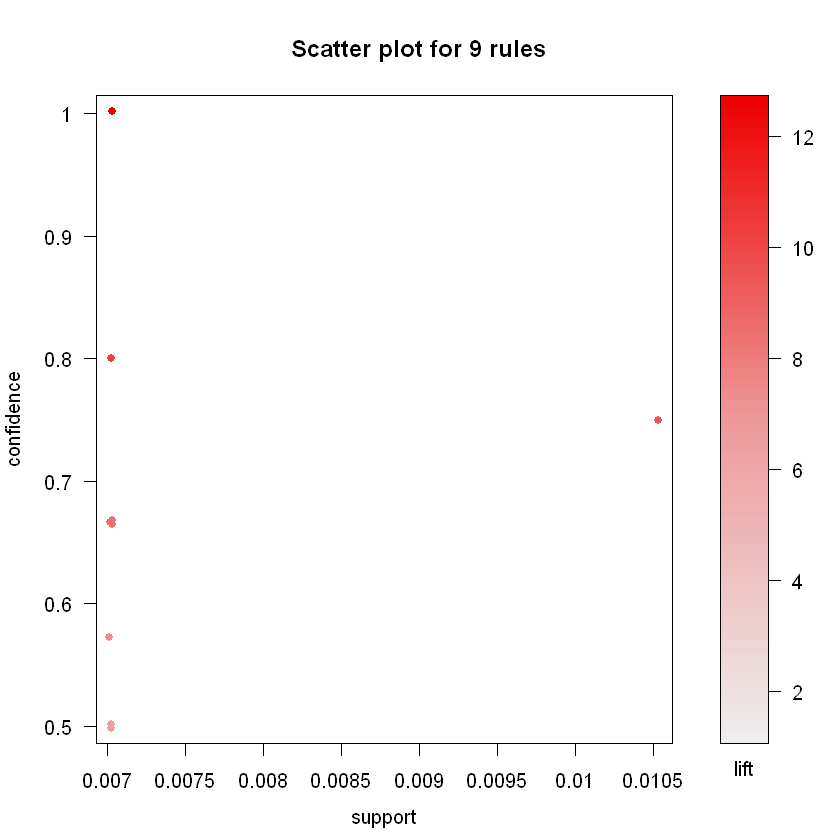

In [20]:
plot(chabior.rules,  measure=c("support", "confidence"), shading="lift")


Itemsets in Antecedent (LHS)
 [1] "{Filip_Guźla}"                       
 [2] "{Wojciech_Kalinowski}"               
 [3] "{Agata_Kulesza,Marian_Dziędziel}"    
 [4] "{Marcin_Dorociński,Marian_Dziędziel}"
 [5] "{Tomasz_Oświeciński}"                
 [6] "{Piotr_Stramowski}"                  
 [7] "{Agata_Kulesza,Marcin_Dorociński}"   
 [8] "{Krzysztof_Stelmaszyk}"              
 [9] "{Rafał_Zawierucha}"                  
[10] "{Anita_Poddębniak}"                  
[11] "{Dariusz_Chojnacki}"                 
[12] "{Roman_Gancarczyk}"                  
[13] "{Marcin_Juchniewicz}"                
[14] "{Piotr_Tołoczko}"                    
[15] "{Lech_Dyblik}"                       
[16] "{Wojciech_Machnicki}"                
[17] "{Andrzej_Deskur}"                    
[18] "{Jacek_Braciak}"                     
[19] "{Bogusław_Linda}"                    
[20] "{Marek_Kalita}"                      
[21] "{Borys_Szyc}"                        
[22] "{Daniel_Olbrychski}"                 
[23

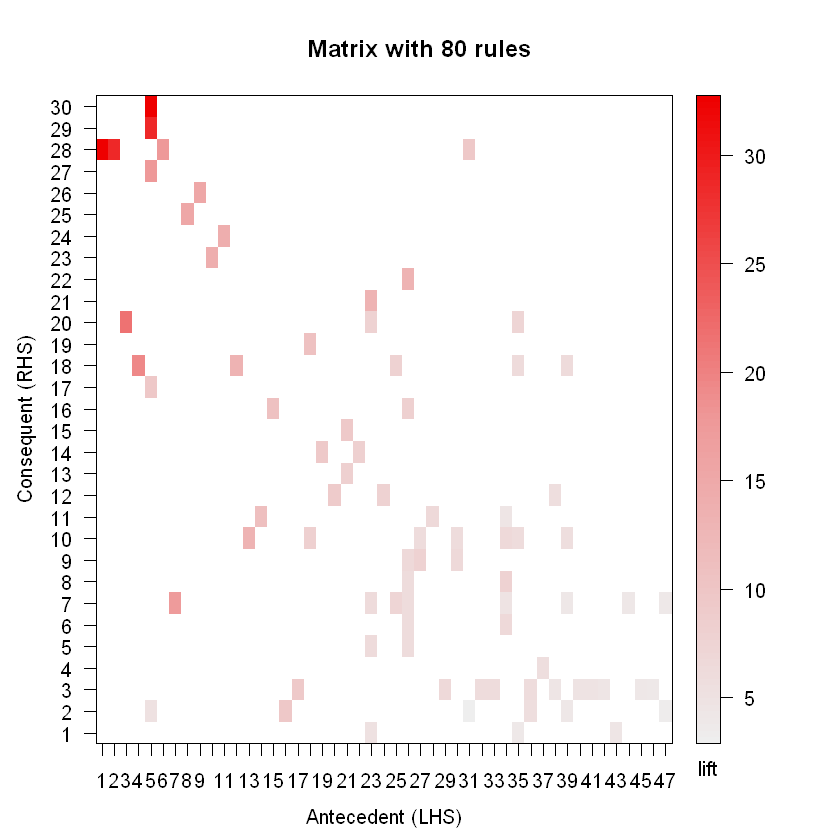

In [31]:
plot(rules, method="matrix", measure="lift")

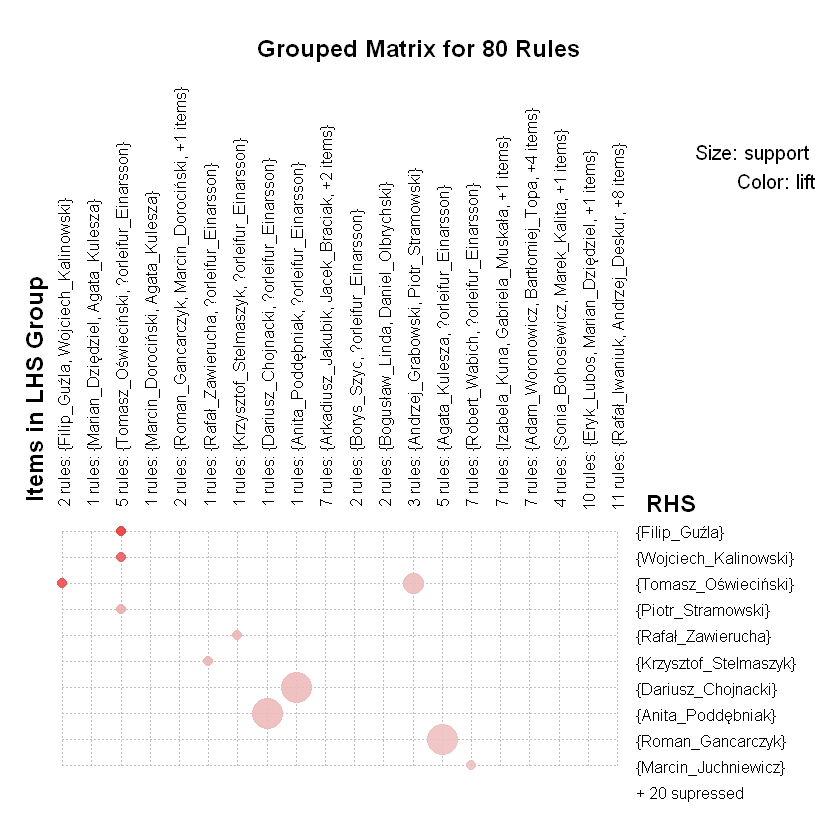

In [32]:
plot(rules, method="grouped") 

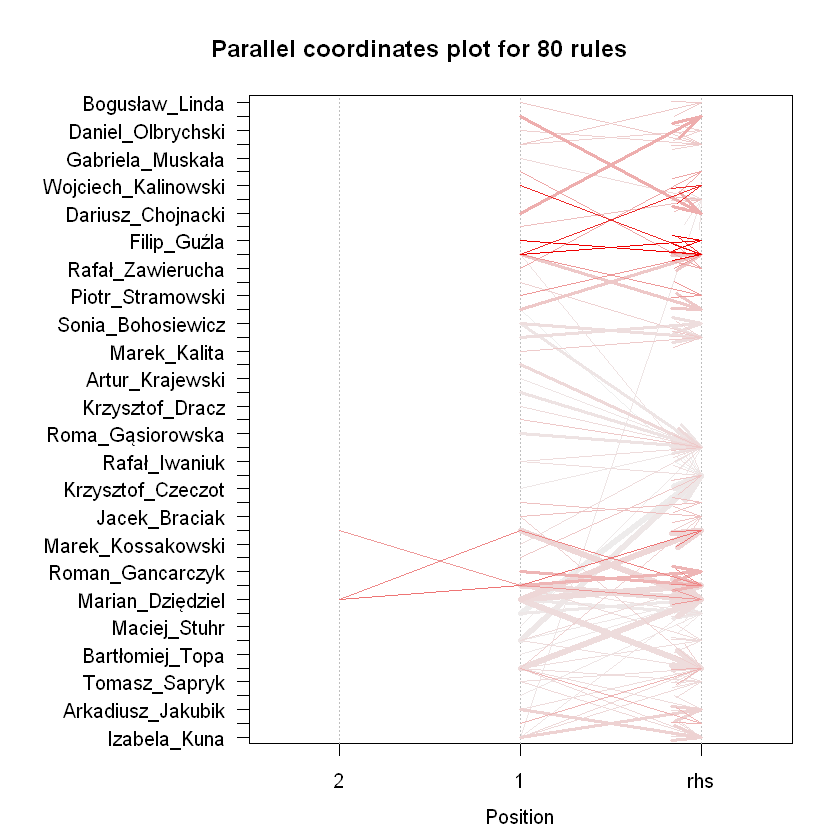

In [33]:
plot(rules, method="paracoord", control=list(reorder=TRUE))

In [38]:
df_tmp<-df[,itemFrequency(df)>0.05] # selected transactions
jaccard <- dissimilarity(df_tmp, which="items", method = "jaccard")
round(jaccard, 2) 

                   Adam_Woronowicz Andrzej_Chyra Borys_Szyc Janusz_Chabior
Andrzej_Chyra                 0.98                                        
Borys_Szyc                    0.97          0.98                          
Janusz_Chabior                0.88          0.96       0.96               
Łukasz_Simlat                 0.94          0.92       0.95           0.93
Marian_Dziędziel              0.88          0.97       0.93           0.93
Piotr_Głowacki                0.96          0.97       0.94           0.92
Przemysław_Bluszcz            0.95          1.00       0.97           0.93
                   Łukasz_Simlat Marian_Dziędziel Piotr_Głowacki
Andrzej_Chyra                                                   
Borys_Szyc                                                      
Janusz_Chabior                                                  
Łukasz_Simlat                                                   
Marian_Dziędziel            0.90                                
Piotr_Głow

In [37]:
df_tmp

transactions in sparse format with
 570 transactions (rows) and
 8 items (columns)